In [1]:
import uproot as up
import awkward as ak
import pandas as pd
from scipy.optimize import curve_fit

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm, trange
import time
from pathlib import Path

from funcs import *

/storage/home/abb5994/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/storage/home/abb5994/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
water_cosmics_file = '/scratch/abb5994/run3056/ntuple/eos_run_003056_all.ntuple.root'
#water_cosmics_file = '/scratch/abb5994/run3056/ntuple/eos_run_003056.1.ntuple.root'


#155000
run = Run(water_cosmics_file,nevents=155000)
run.print_nevents_in_file()
run.load_meta_data()
run.load_event_data()


There are 155610 events in /scratch/abb5994/run3056/ntuple/eos_run_003056_all.ntuple.root
Meta Keys: ['runId', 'runType', 'runTime', 'dsentries', 'macro', 'pmtType', 'pmtId', 'pmtChannel', 'pmtIsOnline', 'pmtCableOffset', 'pmtChargeScale', 'pmtPulseWidthScale', 'pmtX', 'pmtY', 'pmtZ', 'pmtU', 'pmtV', 'pmtW', 'digitizerWindowSize', 'digitizerSampleRate_GHz', 'digitizerDynamicRange_mV', 'digitizerResolution_mVPerADC', 'calibId', 'calibMode', 'calibIntensity', 'calibWavelength', 'calibName', 'calibTime', 'calibX', 'calibY', 'calibZ', 'calibU', 'calibV', 'calibW', 'geo_index', 'geo_file', 'experiment', 'source_pos_x', 'source_pos_y', 'source_pos_z', 'source_rot_x', 'source_rot_y', 'source_rot_z']
Took 0.02 seconds to load meta data for 155000 events
Output Keys: ['mcpdg', 'mcx', 'mcy', 'mcz', 'mcu', 'mcv', 'mcw', 'mcke', 'mct', 'evid', 'subev', 'nhits', 'triggerTime', 'timestamp', 'trigger_word', 'event_cleaning_word', 'timeSinceLastTrigger_us', 'mcid', 'mcparticlecount', 'mcpecount', 'mcn

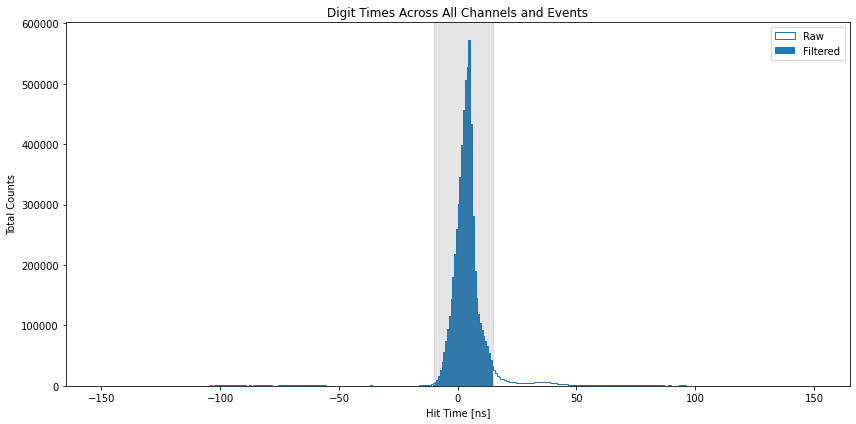

In [9]:
run.apply_hit_cleaning()
run.plot_timing_cut()

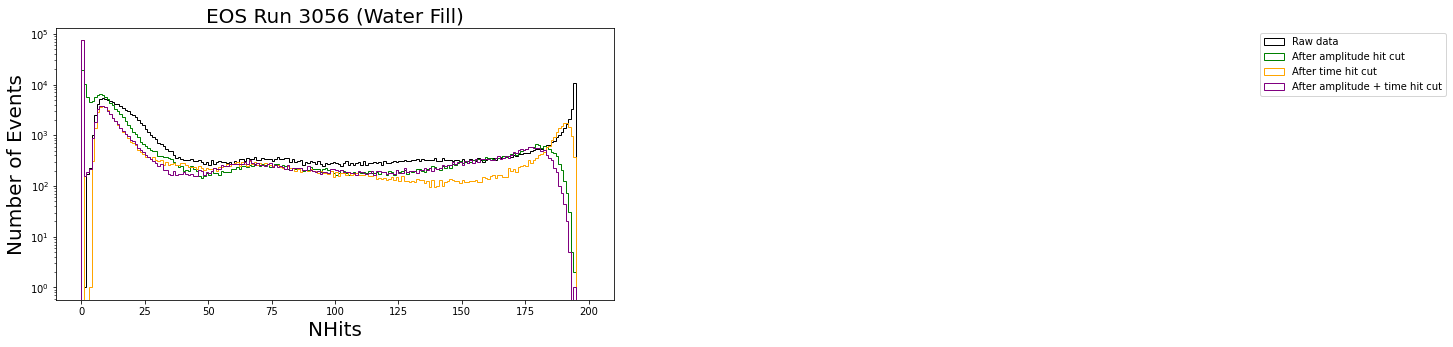

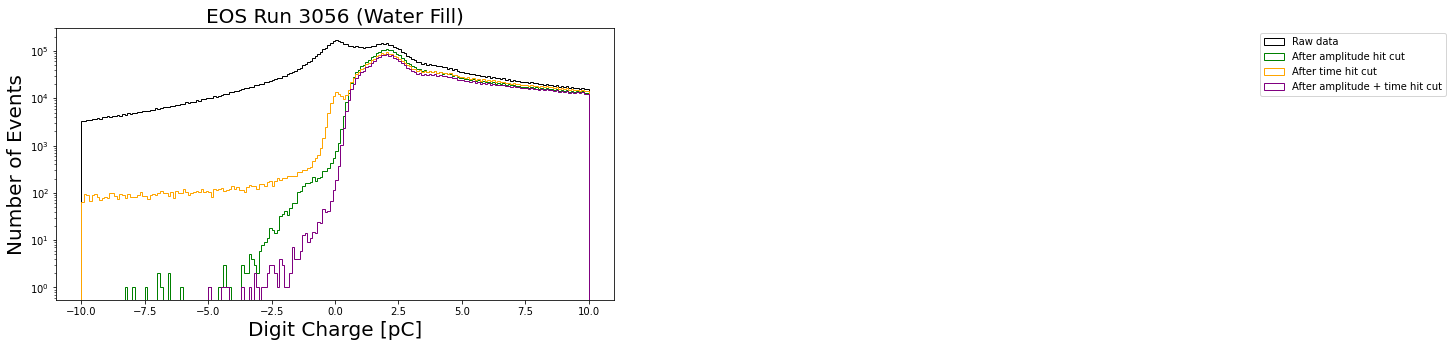

In [5]:
run.make_nhit_masks()

[      nan 20124368. 46384896. ...   306192. 17718384.   288208.]
[True, False, False, True, False, True, ..., False, False, False, False, True]
[108, 11, 161, 110, 7, 73, 5, 0, 0, 179, ..., 0, 0, 120, 0, 8, 16, 155, 10, 76]


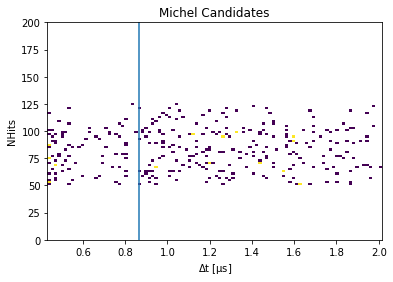

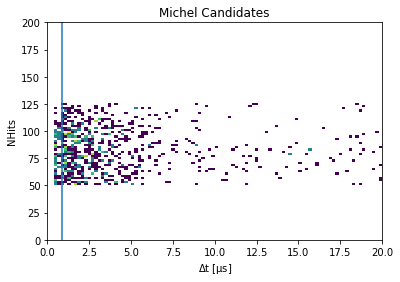

In [6]:
run.compute_delayed_times_relative_to_prompt_with_ts()
run.plot_nhit_dt()

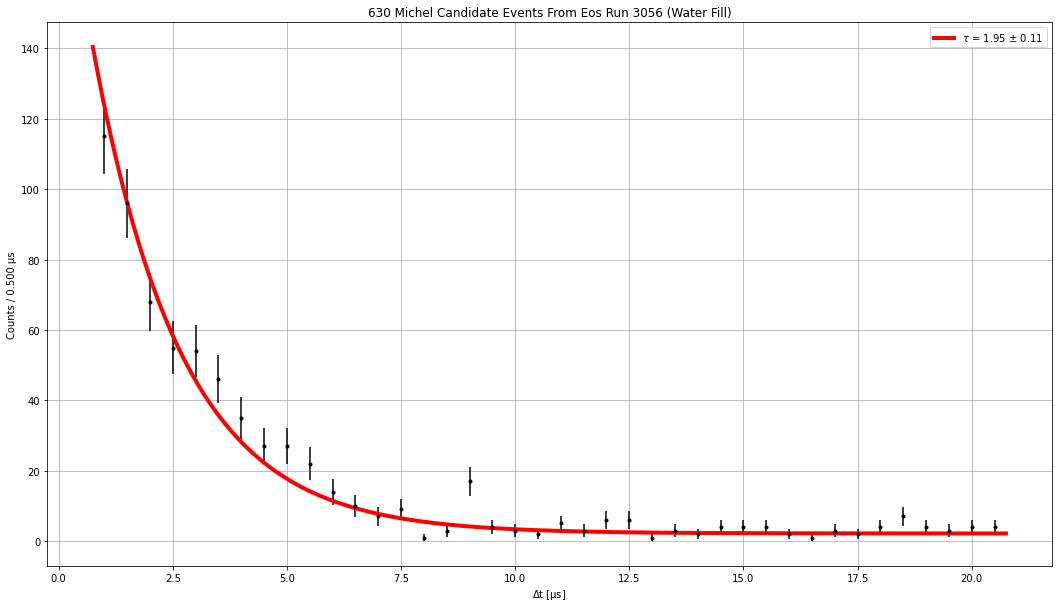

In [7]:
run.fit_muon_lifetime()

16562 [      nan 20124368. 46384896. ...   306192. 17718384.   288208.]
155000 [True, False, False, True, False, True, ..., False, False, False, False, True]
16562 [False False False ... False False False]
155000 [False False False ... False False False]
630


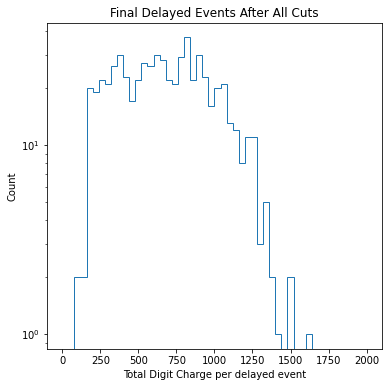

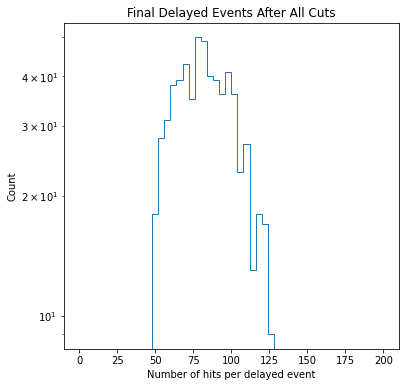

In [8]:
run.make_deliverables()
run.plot_final_nhit_charges()

In [ ]:
ofname = '/scratch/abb5994/run3056/ntuple/eos_run_003056_michels1.ntuple.root'
run.create_michel_file(ofname)

In [10]:
sim_michel = "/storage/group/dfc13/default/abald/eos/data/michel_spec_run3056/e_spec_1.ntuple.root"

sim = SimRun(sim_michel,run.pmt_is_online,nevents=1000)
sim.print_nevents_in_file()
sim.load_meta_data()
sim.load_event_data()

There are 1001 events in /storage/group/dfc13/default/abald/eos/data/michel_spec_run3056/e_spec_1.ntuple.root
Meta Keys: ['runId', 'runType', 'runTime', 'dsentries', 'macro', 'pmtType', 'pmtId', 'pmtChannel', 'pmtIsOnline', 'pmtCableOffset', 'pmtChargeScale', 'pmtPulseWidthScale', 'pmtX', 'pmtY', 'pmtZ', 'pmtU', 'pmtV', 'pmtW', 'digitizerWindowSize', 'digitizerSampleRate_GHz', 'digitizerDynamicRange_mV', 'digitizerResolution_mVPerADC', 'calibId', 'calibMode', 'calibIntensity', 'calibWavelength', 'calibName', 'calibTime', 'calibX', 'calibY', 'calibZ', 'calibU', 'calibV', 'calibW', 'geo_index', 'geo_file', 'experiment', 'source_pos_x', 'source_pos_y', 'source_pos_z', 'source_rot_x', 'source_rot_y', 'source_rot_z']
Took 0.01 seconds to load meta data for 1000 events
Output Keys: ['mcpdg', 'mcx', 'mcy', 'mcz', 'mcu', 'mcv', 'mcw', 'mcke', 'mct', 'evid', 'subev', 'nhits', 'triggerTime', 'timestamp', 'trigger_word', 'event_cleaning_word', 'timeSinceLastTrigger_us', 'mcid', 'mcparticlecount',

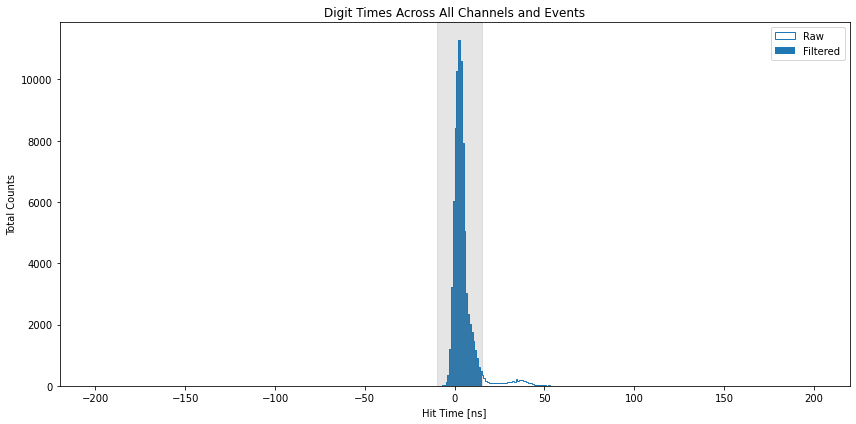

In [11]:
sim.apply_hit_cleaning()
sim.plot_timing_cut()

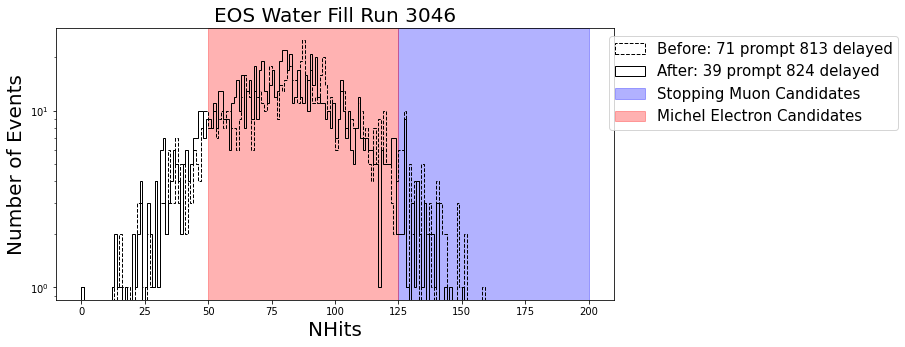

In [12]:
sim.make_nhit_masks() 

824


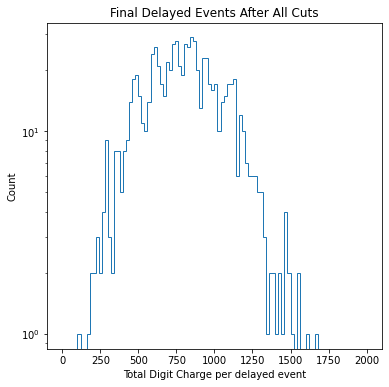

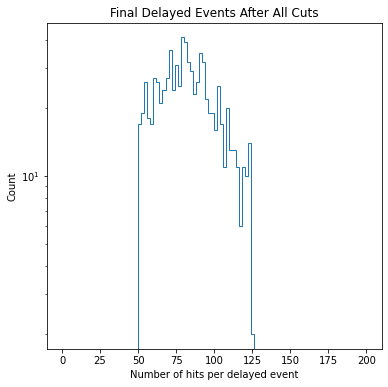

In [13]:
sim.make_deliverables()
sim.plot_final_nhit_charges()

In [ ]:
ofname = '/storage/group/dfc13/default/abald/eos/data/michel_spec_run3056/e_spec_michels_corr.ntuple.root'
sim.create_michel_file(ofname)

In [15]:
sim_fname = '/storage/group/dfc13/default/abald/eos/data/michel_spec_run3056/e_spec_michels.ntuple.root'
data_fname = '/scratch/abb5994/run3056/ntuple/eos_run_003056_michels.ntuple.root'
data1_fname = '/scratch/abb5994/run3056/ntuple/eos_run_003056_michels1.ntuple.root'

nhit_sim, charge_sim, times_sim, corr_times_sim, quad_times_sim, trig_times_sim, local_trig_times_sim = get_nhits_charges_times(sim_fname)
nhit_data, charge_data, times_data, corr_times_data, quad_times_data, trig_times_data, local_trig_times_data = get_nhits_charges_times(data_fname)
nhit_data1, charge_data1, times_data1, corr_times_data1, quad_times_data1, trig_times_data1, local_trig_times_data1 = get_nhits_charges_times(data1_fname)

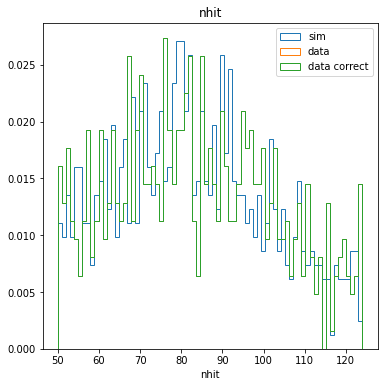

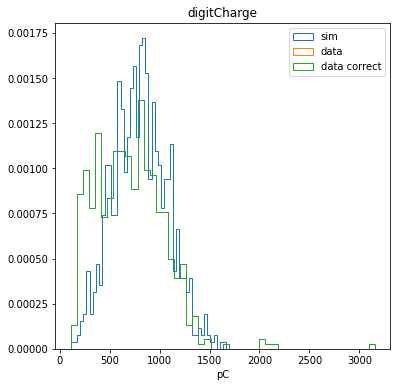

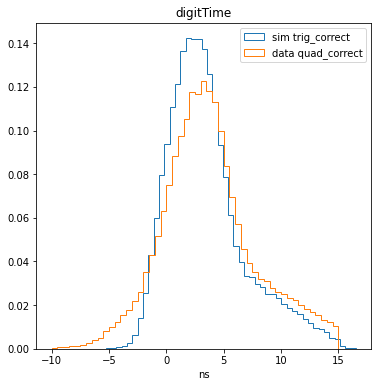

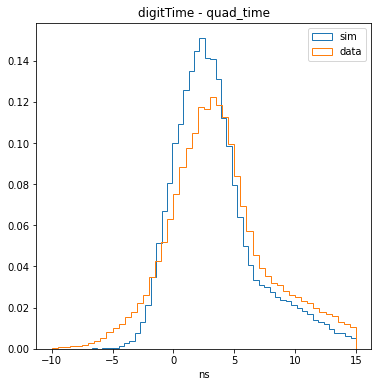

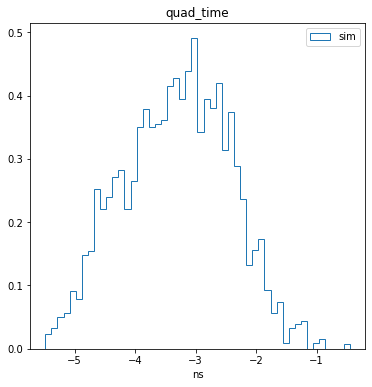

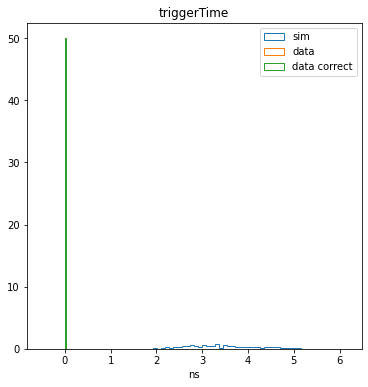

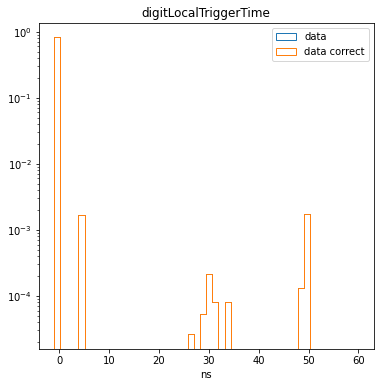

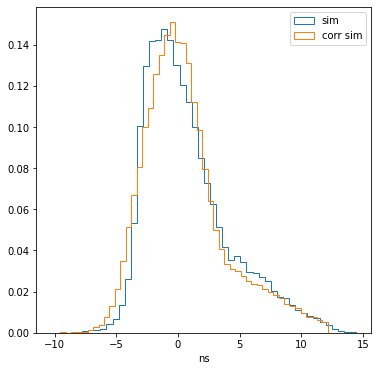

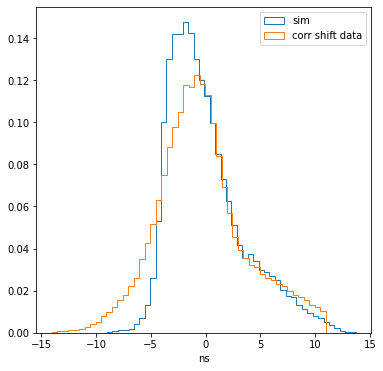

In [16]:
plt.figure(figsize=(6,6))
plt.hist(nhit_sim, bins=75, histtype='step', label='sim', density=True)
plt.hist(nhit_data, bins=75, histtype='step', label='data', density=True)
plt.hist(nhit_data1, bins=75, histtype='step', label='data correct', density=True)
plt.xlabel('nhit')
plt.title('nhit')
plt.legend()

plt.figure(figsize=(6,6))
plt.hist(charge_sim, bins=50, histtype='step', label='sim', density=True)
plt.hist(charge_data, bins=50, histtype='step', label='data', density=True)
plt.hist(charge_data1, bins=50, histtype='step', label='data correct', density=True)
plt.xlabel('pC')
plt.title('digitCharge')
plt.legend()

plt.figure(figsize=(6,6))
plt.hist(times_sim + trig_times_sim, bins=50, histtype='step', label='sim trig_correct', density=True)
#plt.hist(times_data, bins=50, histtype='step', label='data', density=True)
plt.hist(times_data1, bins=50, histtype='step', label='data quad_correct', density=True)
plt.xlabel('ns')
plt.title('digitTime')
plt.legend()

plt.figure(figsize=(6,6))
plt.hist(corr_times_sim, bins=50, histtype='step', label='sim', density=True)
plt.hist(corr_times_data, bins=50, histtype='step', label='data', density=True)
#plt.hist(corr_times_data1, bins=50, histtype='step', label='data correct', density=True)
plt.xlabel('ns')
plt.title('digitTime - quad_time')
plt.legend()

plt.figure(figsize=(6,6))
plt.hist(quad_times_sim, bins=50, histtype='step', label='sim', density=True)
#plt.hist(quad_times_data, bins=50, histtype='step', label='data', density=True)
#plt.hist(quad_times_data1, bins=50, histtype='step', label='data correct', density=True)
plt.xlabel('ns')
plt.title('quad_time')
plt.legend()

plt.figure(figsize=(6,6))
plt.hist(trig_times_sim, bins=50, histtype='step', label='sim', density=True)
#plt.hist(trig_times_sim + quad_times_sim, bins=50, histtype='step')
plt.hist(trig_times_data, bins=50, histtype='step', label='data', density=True)
plt.hist(trig_times_data1, bins=50, histtype='step', label='data correct', density=True)
plt.xlabel('ns')
plt.title('triggerTime')
plt.legend()

plt.figure(figsize=(6,6))
#plt.hist(local_trig_times_sim, bins=50, histtype='step', label='sim', density=True)
#plt.hist(trig_times_sim + quad_times_sim, bins=50, histtype='step')
plt.hist(local_trig_times_data, bins=50, histtype='step', label='data', density=True, range=(-1, 60))
plt.hist(local_trig_times_data1, bins=50, histtype='step', label='data correct', density=True, range=(-1,60))
plt.xlabel('ns')
plt.title('digitLocalTriggerTime')
plt.yscale('log')
plt.legend()

plt.figure(figsize=(6,6))
plt.hist(times_sim - np.median(times_sim), bins=50, histtype='step', label='sim', density=True)
plt.hist(corr_times_sim - np.median(corr_times_sim), bins=50, histtype='step', label='corr sim', density=True)
plt.xlabel('ns')
plt.legend()

plt.figure(figsize=(6,6))
plt.hist(times_sim, bins=50, histtype='step', label='sim', density=True)
plt.hist(times_data1 - np.median(times_data1) + np.median(times_sim), bins=50, histtype='step', label='corr shift data', density=True)
plt.xlabel('ns')
plt.legend()

plt.show()